In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# ACF and PACF for DJIA and sentiment attitude

In [3]:
# Importing DJIA index data for checking stationarity
time_series_data=pd.read_csv('../input/dataset-financial/DJIA_table.csv',parse_dates=[0],usecols=['Date','Adj Close'],date_parser=lambda x: pd.datetime.strptime(x,'%Y-%m-%d'))
# Setting 'Date' as the index of dataframe
time_series_data.set_index('Date',inplace=True)
time_series_data.reindex()
time_series_data.sort_index(ascending=True, inplace=True)
# Have a look at the data
time_series_data['Direction'] = np.where(time_series_data['Adj Close'].shift(-5) <= time_series_data['Adj Close'], 0, 1)
time_series_data=time_series_data.loc['2011-04-01':'2015-04-01']
time_series_data.dropna(inplace=True)
#time_series_data.sort_index(ascending=True, inplace=True)
#time_series_data.fillna(method='ffill',inplace=True)
time_series_data.drop(['Adj Close'],axis=1,inplace=True)
time_series_data.head()
print(time_series_data['Direction'])

Date
2011-04-01    1
2011-04-04    0
2011-04-05    0
2011-04-06    0
2011-04-07    0
             ..
2015-03-26    1
2015-03-27    1
2015-03-30    0
2015-03-31    1
2015-04-01    1
Name: Direction, Length: 1006, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [4]:
# Defining ACF and PACF plot functions-
def ACF_plot(data,title):
    plot_acf(data,lags=20)
    plt.title(title)
    plt.show()
def PACF_plot(data,title):
    plot_pacf(data,lags=20)
    plt.title(title)
    plt.show()

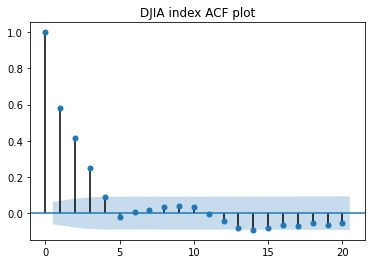

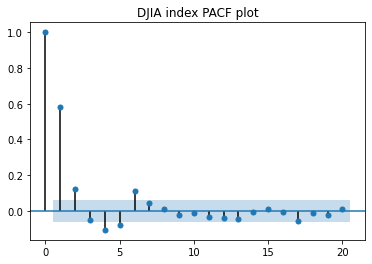

In [5]:
ACF_plot(time_series_data,'DJIA index ACF plot')
PACF_plot(time_series_data,'DJIA index PACF plot')

In [6]:
articles = pd.read_csv('../input/dataset-financial/all_results.csv')

articles.Date = pd.to_datetime(articles.Date, format='%d/%m/%Y %H:%M:%S')

articles.set_index('Date', inplace=True)
articles.reindex()
articles.sort_index(ascending=True, inplace=True)
articles.drop(columns=['Original', 'Original', 'TotalWords', 'TotalSentimentWords', 'Id', 'Anger',
                           'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust'], inplace=True)

#print(articles.head())
#articles['Calculated']=articles['Calculated']*1000

articles['Calculated'] = articles['Calculated'].apply(lambda x: (x-3)/2)
#articles['Calculated'] = articles['Calculated'].apply(lambda x: 1 if x>0 else -1)

#articles.fillna(value=0,inplace=True)

articles = articles.groupby(pd.Grouper(freq = 'D')).mean()
articles=articles.loc['2011-04-01':'2015-04-01']
articles.fillna(value=0,inplace=True)
#articles['Calculated'] = articles['Calculated'].apply(lambda x: 1 if x>0 else 0)
print(articles.isna().sum())
print(articles)
#articles.reindex()
#articles.sort_index(ascending=True, inplace=True)

articles.head()

Calculated    0
dtype: int64
            Calculated
Date                  
2011-04-01   -0.646160
2011-04-02   -0.610917
2011-04-03   -0.719194
2011-04-04   -0.556981
2011-04-05   -0.718716
...                ...
2015-03-04   -0.509997
2015-03-05   -0.604414
2015-03-06   -0.266325
2015-03-07   -1.000000
2015-03-08   -0.625979

[1438 rows x 1 columns]


,Calculated
Date,
2011-04-01,-0.646160
2011-04-02,-0.610917
2011-04-03,-0.719194
2011-04-04,-0.556981
2011-04-05,-0.718716


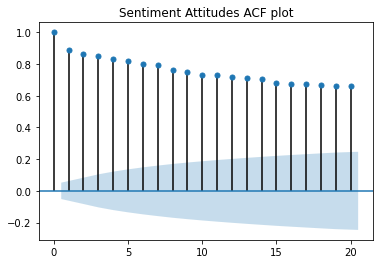

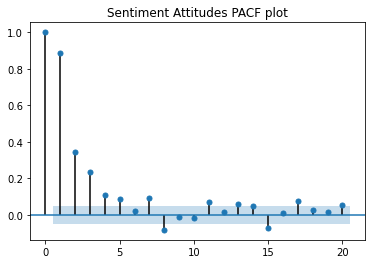

In [7]:
ACF_plot(articles,'Sentiment Attitudes ACF plot')
PACF_plot(articles,'Sentiment Attitudes PACF plot')

# Augmented dickey fuller test

In [37]:
# ADF test for checking stationarity:
def adf_test(data,title,name):
    print('Results of Augmented Dickey Fuller Test for {}:'.format(title))
    dftest = adfuller(data[name], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
def import_time_series_data(stock_name):
    # Importing DJIA index data for checking stationarity
    time_series_data=pd.read_csv('../input/quandl-time-series-data/{}_quandl_stock.csv'.format(stock_name),parse_dates=[0],usecols=['date','Close'],date_parser=lambda x: pd.datetime.strptime(x,'%Y-%m-%d'))
    # Setting 'Date' as the index of dataframe
    time_series_data.set_index('date',inplace=True)
    time_series_data.reindex()
    time_series_data.sort_index(ascending=True, inplace=True)
    # Have a look at the data
    time_series_data['Direction'] = np.where(time_series_data['Close'].shift(-5) <= time_series_data['Close'], 0, 1)
    #time_series_data['Direction']=time_series_data['Close']
    time_series_data.drop(['Close'],axis=1,inplace=True)
    time_series_data=time_series_data.loc['2011-04-01':'2015-04-01']
    time_series_data.sort_index(ascending=True, inplace=True)
    #time_series_data.fillna(value=,inplace=True)
    return time_series_data

In [23]:
DJIA_time_series=time_series_data
adf_test(DJIA_time_series,'DJIA index','Direction')
AAPL_time_series=import_time_series_data('AAPL')
adf_test(AAPL_time_series,'AAPL','Direction')
GOOGL_time_series=import_time_series_data('GOOGL')
adf_test(GOOGL_time_series,'GOOGL','Direction')
JPM_time_series=import_time_series_data('JPM')
adf_test(JPM_time_series,'JPM','Direction')
HPQ_time_series=import_time_series_data('HPQ')
adf_test(HPQ_time_series,'HPQ','Direction')



Results of Augmented Dickey Fuller Test for DJIA index:
Test Statistic                -1.070064e+01
p-value                        3.530755e-19
#Lags Used                     5.000000e+00
Number of Observations Used    1.000000e+03
Critical Value (1%)           -3.436906e+00
Critical Value (5%)           -2.864435e+00
Critical Value (10%)          -2.568311e+00
dtype: float64
Results of Augmented Dickey Fuller Test for AAPL:
Test Statistic                   0.013885
p-value                          0.959665
#Lags Used                      11.000000
Number of Observations Used    994.000000
Critical Value (1%)             -3.436946
Critical Value (5%)             -2.864452
Critical Value (10%)            -2.568321
dtype: float64
Results of Augmented Dickey Fuller Test for GOOGL:
Test Statistic                   -0.801606
p-value                           0.818650
#Lags Used                        0.000000
Number of Observations Used    1005.000000
Critical Value (1%)              -3.436

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  del sys.path[0]


Test Statistic                   -0.636770
p-value                           0.862455
#Lags Used                        2.000000
Number of Observations Used    1003.000000
Critical Value (1%)              -3.436887
Critical Value (5%)              -2.864426
Critical Value (10%)             -2.568307
dtype: float64
Results of Augmented Dickey Fuller Test for HPQ:
Test Statistic                   -1.586743
p-value                           0.490250
#Lags Used                        0.000000
Number of Observations Used    1005.000000
Critical Value (1%)              -3.436873
Critical Value (5%)              -2.864420
Critical Value (10%)             -2.568304
dtype: float64


# Cross correlation function results

In [10]:
def cross_correlation(x,y,title):
    plt.xcorr(x,y,maxlags=20,)
    plt.title(title)
    plt.show()

In [24]:
# importing S&p data
# Importing DJIA index data for checking stationarity
spy=pd.read_csv('../input/dataset-financial/spy.csv',parse_dates=[0],usecols=['Date','Value'],date_parser=lambda x: pd.datetime.strptime(x,'%d/%m/%Y'))
# Setting 'Date' as the index of dataframe
spy.set_index('Date',inplace=True)
spy.reindex()
spy.sort_index(ascending=True, inplace=True)
# Have a look at the data
spy['Direction'] = np.where(spy['Value'].shift(-5) <= spy['Value'], 0, 1)
spy=spy.loc['2011-04-01':'2015-04-01']
spy.dropna(inplace=True)
#time_series_data.sort_index(ascending=True, inplace=True)
#time_series_data.fillna(method='ffill',inplace=True)
spy.drop(['Value'],axis=1,inplace=True)
spy.head()
print(spy['Direction'])

Date
2011-04-01    0
2011-04-04    0
2011-04-05    0
2011-04-06    0
2011-04-07    0
             ..
2015-03-26    1
2015-03-27    1
2015-03-30    0
2015-03-31    1
2015-04-01    1
Name: Direction, Length: 1006, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(186, 1) (186, 1)


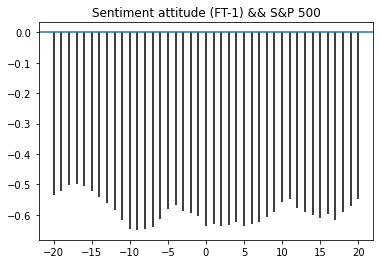

(145, 1) (145, 1)


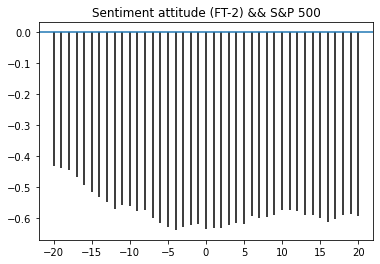

(90, 1) (90, 1)


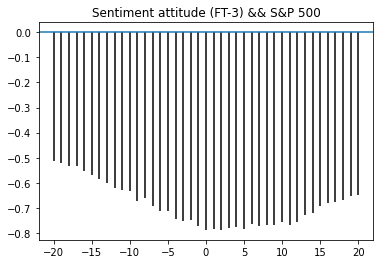

In [12]:
# for financial news 1.
spy1=spy.loc['2011-04-01':'2011-12-26']
financial_news_1=articles.loc[spy1.index]
print(spy1.shape,financial_news_1.shape)
cross_correlation(financial_news_1.values.flatten(),spy1.values.flatten(),'Sentiment attitude (FT-1) && S&P 500')

# financial news 2
spy2=spy.loc['2014-04-01':'2014-10-26']
financial_news_2=articles.loc[spy2.index]
print(spy2.shape,financial_news_2.shape)
cross_correlation(financial_news_2.values.flatten(),spy2.values.flatten(),'Sentiment attitude (FT-2) && S&P 500')

# financial news 3
spy3=spy.loc['2014-10-26':'2015-3-08']
financial_news_3=articles.loc[spy3.index]
print(spy3.shape,financial_news_3.shape)
cross_correlation(financial_news_3.values.flatten(),spy3.values.flatten(),'Sentiment attitude (FT-3) && S&P 500')

In [50]:
# Granger causality test
from statsmodels.tsa.stattools import grangercausalitytests
def granger_causality(stock,sentiment,stock_name):
    print('Sentiment causing price of {} stock'.format(stock_name))
    grangercausalitytests(np.hstack([stock,sentiment]),maxlag=2,verbose=0.25)
    print('\nPrice of {} stock causing sentiment'.format(stock_name))
    grangercausalitytests(np.hstack([sentiment,stock]),maxlag=2,verbose=0.25)

In [54]:
ft1_dates=articles.loc['2011-04-01':'2011-12-25'].index
stocktoseries={'AAPL':AAPL_time_series,
              'GOOGL':GOOGL_time_series,
              'SPY':spy,
              'JPM':JPM_time_series,
              'HPQ':HPQ_time_series}
stocks=['AAPL','GOOGL','SPY','JPM','HPQ']
stocks=['HPQ']
for stock in stocks:
    dates=stocktoseries[stock].loc['2011-04-01':'2011-12-25'].index
    stock_data=stocktoseries[stock].loc['2011-04-01':'2011-12-25'].values
    sentiment_data=articles.loc[dates].values
    #print(np.hstack([stock_data,sentiment_data]))
    granger_causality(stock_data,sentiment_data,stock)
    
    
    


Sentiment causing price of HPQ stock

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9805  , p=0.0475  , df_denom=182, df_num=1
ssr based chi2 test:   chi2=4.0461  , p=0.0443  , df=1
likelihood ratio test: chi2=4.0025  , p=0.0454  , df=1
parameter F test:         F=3.9805  , p=0.0475  , df_denom=182, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1609  , p=0.1182  , df_denom=179, df_num=2
ssr based chi2 test:   chi2=4.4426  , p=0.1085  , df=2
likelihood ratio test: chi2=4.3898  , p=0.1114  , df=2
parameter F test:         F=2.1609  , p=0.1182  , df_denom=179, df_num=2

Price of HPQ stock causing sentiment

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0061  , p=0.9378  , df_denom=182, df_num=1
ssr based chi2 test:   chi2=0.0062  , p=0.9372  , df=1
likelihood ratio test: chi2=0.0062  , p=0.9372  , df=1
parameter F test:         F=0.0061  , p=0.9378  , df_denom=182, df_num=1

Granger Causality
